In [209]:
# importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data preprocessing

In [210]:
#Loading the dataset
df = pd.read_csv("E:/Datasets/Datasets/train.csv")

In [211]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [212]:
# Getting the shape of the dataset
df.shape

(891, 12)

In [12]:
# columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
# datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [213]:
# Checking for duplicates
df.duplicated().sum()

0

In [214]:
# checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [215]:
nv = df.isnull().sum().sort_values(ascending = False)
nv = nv[nv>0]
nv # null value

Cabin       687
Age         177
Embarked      2
dtype: int64

In [216]:
# Checking what percentage column containing missing values
df.isnull().sum().sort_values(ascending= False)*100/len(df)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

since cabin column has more than 75% of null values. We can drop it

In [217]:
df.drop(columns = 'Cabin', axis = 1, inplace = True)

In [218]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [219]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [220]:
# filling null values in age columns with mean values of of age 
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [221]:
df.Age.isnull().sum()

0

In [222]:
# filling null values in embarked column with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True )

In [223]:
df.Embarked.isnull().sum()

0

In [224]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [225]:
# Finding number of unique values in each columns
df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             89
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [226]:
df.Survived.unique()

array([0, 1], dtype=int64)

In [227]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [228]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [229]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [230]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [231]:
# dropping unnecessary Cols
df.drop(columns=['PassengerId', 'Name','Ticket'], axis = 1, inplace = True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [232]:
# showing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [233]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


In [234]:
df.describe(include = 'O')

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


# Data Visualization

In [235]:
df1 = df['Sex'].value_counts()

In [236]:
df1

male      577
female    314
Name: Sex, dtype: int64

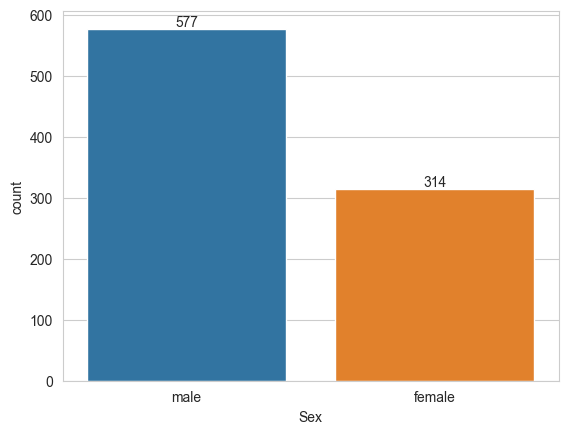

In [237]:
# Plotting barplot for Sex column
sns.set_style('whitegrid')
ax = sns.countplot(x = df.Sex)
for bars in ax.containers:
    ax.bar_label(bars)

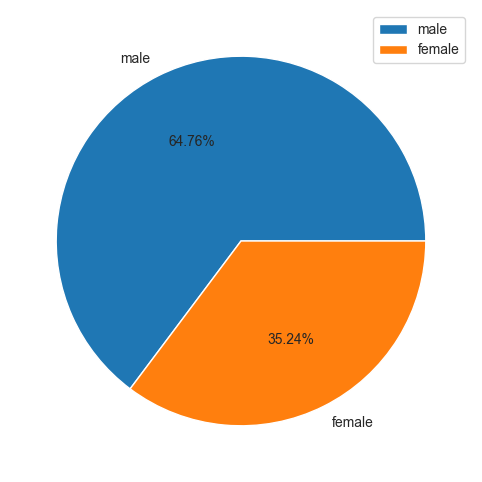

In [238]:
# Plotting Percentage Distribution of Sex column
plt.figure(figsize = (10,6))
plt.pie(df1.values, labels = df1.index, autopct = '%.2f%%')
plt.legend()
plt.show()

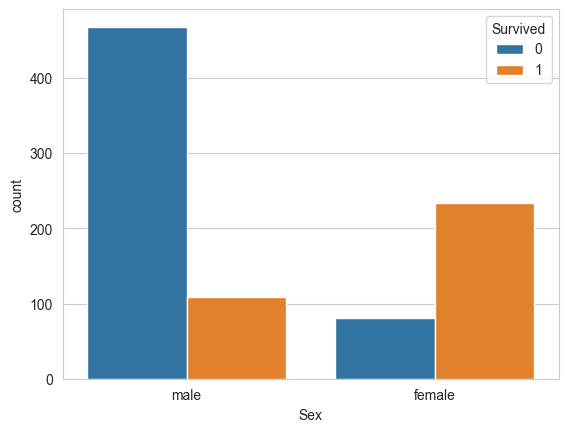

In [239]:
# showing Distribution of Sex Column survived wise
sns.set_style('whitegrid')
sns.countplot(x = df.Sex, hue = df.Survived)
plt.show()

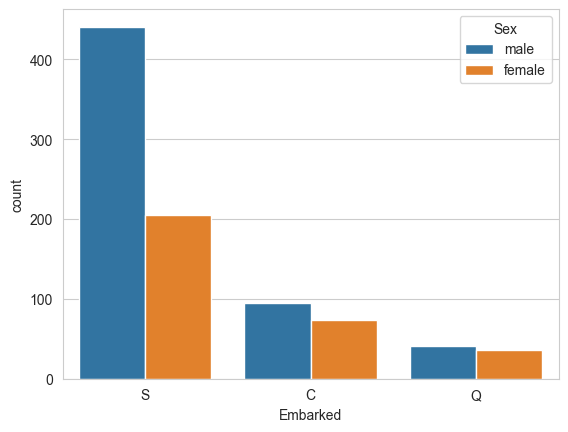

In [243]:
# distribution of Embarked Sex wise
sns.set_style('whitegrid')
sns.countplot(x = df.Embarked, hue = df.Sex)
plt.show()

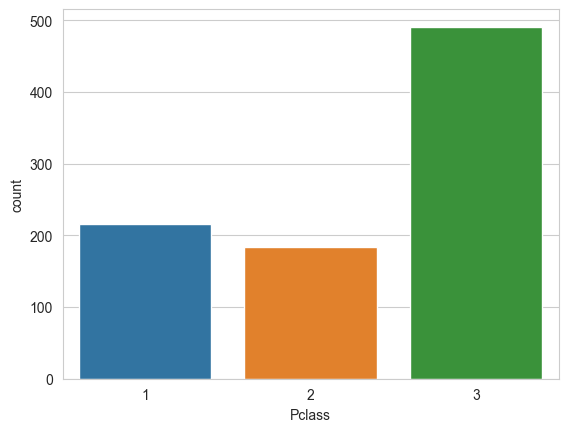

In [244]:
# Ploting countplot for Pclass column
sns.set_style('whitegrid')
sns.countplot(x = df.Pclass)
plt.show()

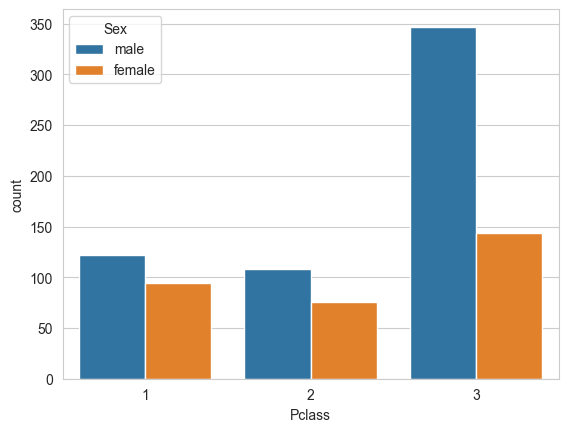

In [245]:
# Distribution of Pclass Sex wise
sns.set_style('whitegrid')
sns.countplot(x = df.Pclass, hue = df.Sex)
plt.show()

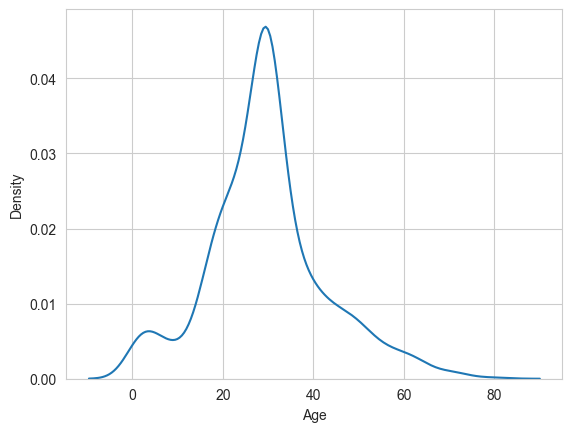

In [246]:
# Age Distribution
sns.set_style('whitegrid')
sns.kdeplot(x = df.Age)
plt.show()

0    549
1    342
Name: Survived, dtype: int64


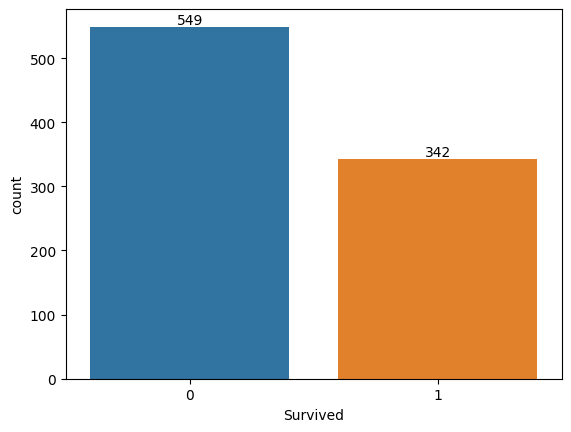

In [66]:
# plot countplot for Survived column
print(df.Survived.value_counts())

#or
ax = sns.countplot(x = df.Survived)
for bars in ax.containers:
    ax.bar_label(bars)

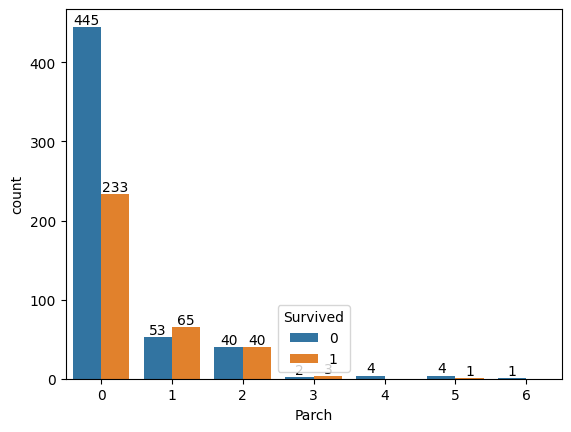

In [71]:
# distribution of Parch Survived wise

ax = sns.countplot(x = df.Parch, hue = df.Survived)
for bars in ax.containers:
    ax.bar_label(bars)

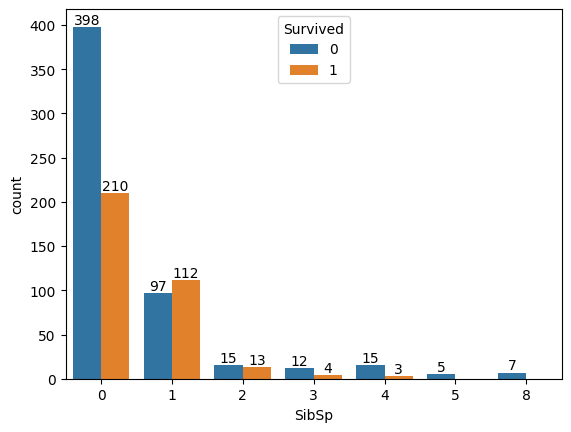

In [74]:
# distribution of Sibsp Survived Wise
ax = sns.countplot(x = df.SibSp, hue= df.Survived)
for bars in ax.containers:
    ax.bar_label(bars)

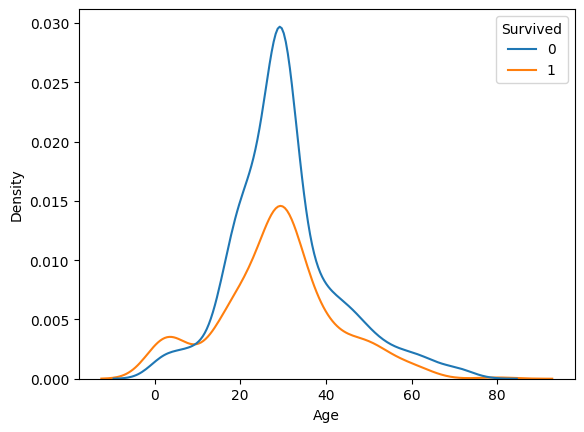

In [75]:
# Distribution of Age Survived Wise
ax = sns.kdeplot(x = df.Age, hue = df.Survived)
for kde in ax.containers:
    ax.kde_label(kde)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


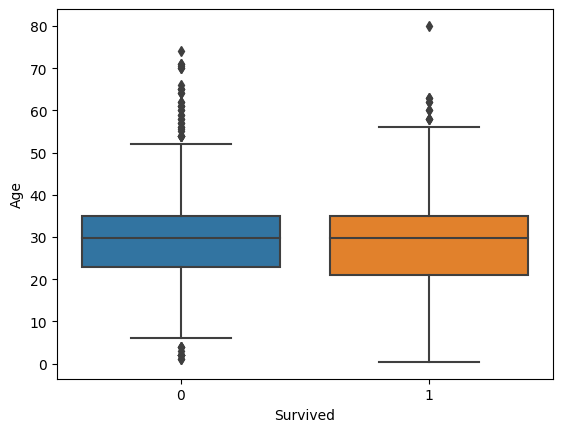

In [87]:
# Checking for outliers
sns.boxplot(data = df, x = 'Survived', y = 'Age')
plt.show()

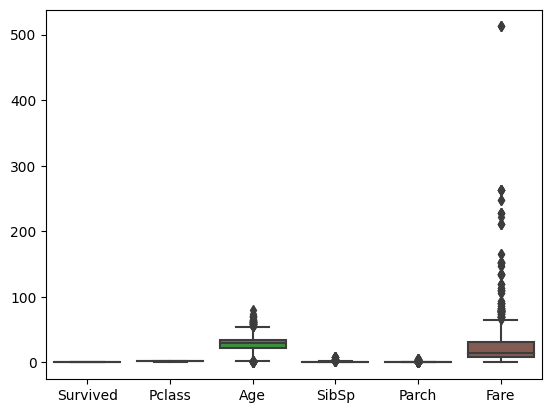

In [88]:
# Checking for outliers
sns.boxplot(data = df)
plt.show()

In [89]:
# showing Correlation
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


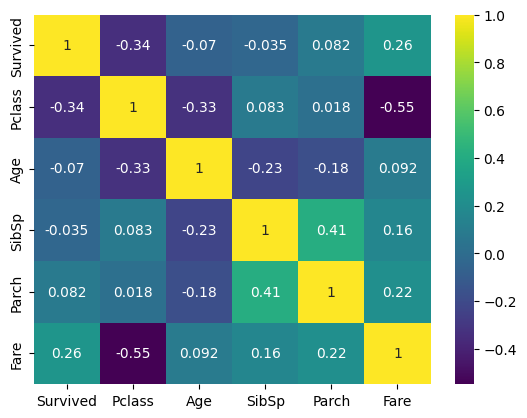

In [97]:
sns.heatmap(df.corr(), annot = True, cmap = "viridis")
plt.show()

Label Encoding

In [247]:
from sklearn.preprocessing import LabelEncoder
# Create an  instance of LabelEncoder
encoder = LabelEncoder()

In [248]:
# applyig label encoding to categorical cols
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

In [249]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [250]:
df.Embarked.unique()

array([2, 0, 1])

In [251]:
df.Sex.unique()

array([1, 0])

### Sex Column

### 0 represents female
### 1 represents Male

### Embarked Column

### 0 represents C
### 1 represents Q
### 2 represents S

# Modeling

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score

Selecting the independent and dependent Features

In [253]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = df[cols]
y = df.Survived
print(x.shape)
print(y.shape)
print(type(x))  # DataFrame
print(type(y))  # Series

(891, 7)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [254]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [255]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Train_Test_spilt

In [256]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


Creating Functions to compute Confusion Matrix, Classification Report and to generate Training and the Testing Score(Accuracy)

In [257]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuracy
     

In [258]:
# Building the logistic regression model
l_reg = LogisticRegression(max_iter = 1000, solver = 'liblinear')
l_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [259]:
# Computing Training and Testin score
mscore(l_reg)

Training Score 0.8052434456928839
Testing Score 0.7666666666666667


In [260]:
# Generating Prediction
y_pred_l_reg = l_reg.predict(x_test)
print(y_pred_l_reg)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [261]:
#  Evaluate the model - confusion matrix, classification Report, accuracy_score
cls_eval(y_test, y_pred_l_reg)
acc_lr = accuracy_score(y_test, ypred_lr)
print('Accuracy Score', acc_lr)

Confusion Matrix
 [[46  7]
 [14 23]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.87      0.81        53
           1       0.77      0.62      0.69        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


In [158]:
# Building the knnClassifier Model
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [159]:
mscore(knn)

Training Score 0.7752808988764045
Testing Score 0.6777777777777778


In [160]:
# generating prediction
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)

[1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]


In [161]:
cls_eval(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy Score', acc_knn)

Confusion Matrix
 [[47  6]
 [23 14]]
Classification Report
               precision    recall  f1-score   support

           0       0.67      0.89      0.76        53
           1       0.70      0.38      0.49        37

    accuracy                           0.68        90
   macro avg       0.69      0.63      0.63        90
weighted avg       0.68      0.68      0.65        90

Accuracy Score 0.6777777777777778


In [162]:
# Building Support Vector Classifier Model
svc = SVC(C=1.0)
svc.fit(x_train, y_train)

SVC()

In [163]:
# Computing Training and Testing score
mscore(svc)

Training Score 0.6891385767790262
Testing Score 0.6333333333333333


In [164]:
# generating prediction
y_pred_svc = svc.predict(x_test)
print(y_pred_svc)

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


In [165]:
cls_eval(y_test, y_pred_svc)
acc_svc = accuracy_score(y_test, y_pred_svc)
print('Accuracy Score', acc_svc)

Confusion Matrix
 [[48  5]
 [28  9]]
Classification Report
               precision    recall  f1-score   support

           0       0.63      0.91      0.74        53
           1       0.64      0.24      0.35        37

    accuracy                           0.63        90
   macro avg       0.64      0.57      0.55        90
weighted avg       0.64      0.63      0.58        90

Accuracy Score 0.6333333333333333


In [166]:
# Building the RandomForest Classifier Model
rfc=RandomForestClassifier(n_estimators=80,criterion='entropy',min_samples_split=5,max_depth=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=80)

In [167]:
mscore(rfc)

Training Score 0.9151061173533084
Testing Score 0.7555555555555555


In [168]:
# generating prediction
y_pred_rfc = rfc.predict(x_test)
print(y_pred_rfc)
     

[1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [183]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,y_pred_rfc)
acc_rfc = accuracy_score(y_test,y_pred_rfc)
print('Accuracy Score',acc_rfc)

Confusion Matrix
 [[47  6]
 [16 21]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.89      0.81        53
           1       0.78      0.57      0.66        37

    accuracy                           0.76        90
   macro avg       0.76      0.73      0.73        90
weighted avg       0.76      0.76      0.75        90

Accuracy Score 0.7555555555555555


In [185]:
# Building the DecisionTree Classifier Model
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_split=10)
dt.fit(x_train, y_train)
mscore(dt)

Training Score 0.8526841448189763
Testing Score 0.7777777777777778


In [187]:
# Generating Prediction
y_pred_dt = dt.predict(x_test)
print(y_pred_dt)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [188]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,y_pred_dt)
acc_dt = accuracy_score(y_test,y_pred_dt)
print('Accuracy Score',acc_dt)

Confusion Matrix
 [[46  7]
 [13 24]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        53
           1       0.77      0.65      0.71        37

    accuracy                           0.78        90
   macro avg       0.78      0.76      0.76        90
weighted avg       0.78      0.78      0.77        90

Accuracy Score 0.7777777777777778


In [189]:
# Builing the Adaboost model
ada_boost  = AdaBoostClassifier(n_estimators=80)
ada_boost.fit(x_train,y_train)
mscore(ada_boost)

Training Score 0.8564294631710362
Testing Score 0.7666666666666667


In [190]:
# Generating the predictions
y_pred_ada_boost = ada_boost.predict(x_test)

In [192]:
# Evaluate the model - confusion matrix, classification Report, Accuracy Score
cls_eval(y_test,y_pred_ada_boost)
acc_adab = accuracy_score(y_test,y_pred_ada_boost)
print('Accuracy Score',acc_adab)

Confusion Matrix
 [[45  8]
 [13 24]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.85      0.81        53
           1       0.75      0.65      0.70        37

    accuracy                           0.77        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


In [203]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','knn','SVC','Random Forest Classifier','Decision Tree Classifier','Ada Boost Classifier'],
    'Score': [acc_lr,acc_knn,acc_svc,acc_rfc,acc_dt,acc_adab]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Decision Tree Classifier,0.777778
0,Logistic Regression,0.766667
5,Ada Boost Classifier,0.766667
3,Random Forest Classifier,0.755556
1,knn,0.677778
2,SVC,0.633333


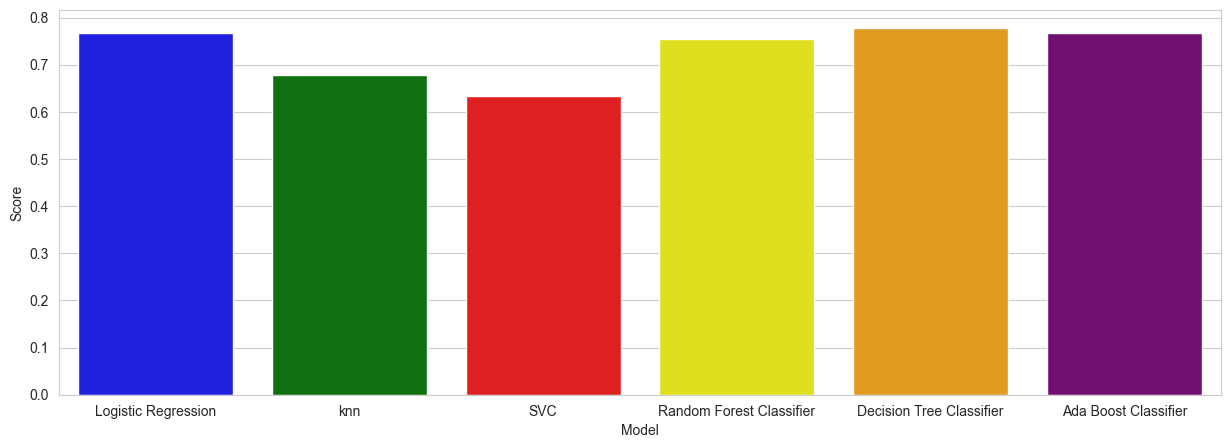

In [204]:
colors = ["blue", "green", "red", "yellow","orange","purple"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

we can do the modeling with other method to see the scores

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score

In [179]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state=2)
abc = AdaBoostClassifier(n_estimators = 50, random_state=2)

In [180]:
clfs = {'SVC': svc,
        'KN': knn,
        'DT': dtc,
        'LR': lrc,
        'RF': rfc,
        'AdaBoost': abc,        
}

In [181]:
def train_classifier(clf, x_train, y_train, x_text, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

In [182]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, x_train,
                y_train, x_test, y_test)
  print("For", name)
  print("Accuracy", current_accuracy)
  print("Precision", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy 0.5888888888888889
Precision 0.0
For KN
Accuracy 0.6444444444444445
Precision 0.5862068965517241
For DT
Accuracy 0.7777777777777778
Precision 0.7741935483870968
For LR
Accuracy 0.7666666666666667
Precision 0.75
For RF
Accuracy 0.7555555555555555
Precision 0.7419354838709677
For AdaBoost
Accuracy 0.7666666666666667
Precision 0.75


In [ ]:
# Let's make the dataframe
models = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN', 'SVC','Random Forest Classifier', 'Ada Boost Classifier', 'Decision Tree Classifier',
    'Score': [acc_lr]        
})

In [196]:
# Let's make the dataframe of performance of these algorithm or model
performance_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy':accuracy_scores,
                               'Precision': precision_scores}).sort_values('Accuracy', ascending = False)

In [195]:
performance_df

,Algorithm,Accuracy,Precision
2,DT,0.777778,0.774194
3,LR,0.766667,0.750000
5,AdaBoost,0.766667,0.750000
4,RF,0.755556,0.741935
1,KN,0.644444,0.586207
0,SVC,0.588889,0.000000


In [199]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [200]:
performance_df1

,Algorithm,variable,value
0,DT,Accuracy,0.777778
1,LR,Accuracy,0.766667
2,AdaBoost,Accuracy,0.766667
3,RF,Accuracy,0.755556
4,KN,Accuracy,0.644444
5,SVC,Accuracy,0.588889
6,DT,Precision,0.774194
7,LR,Precision,0.750000
8,AdaBoost,Precision,0.750000
9,RF,Precision,0.741935


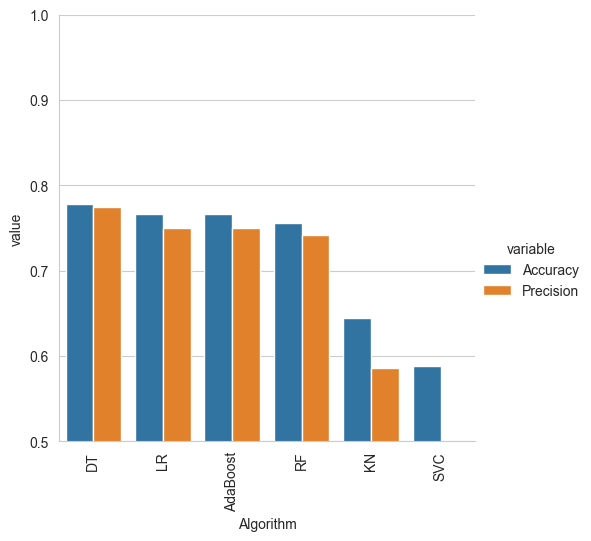

In [202]:
sns.catplot(x = 'Algorithm', y = 'value',
            hue = 'variable', data = performance_df1,
            kind = 'bar',
            height = 5
)

plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

# Clearly Decision Tree wins here